In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import  models, layers
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score
import os
import cv2
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

2024-05-25 15:59:04.288496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-25 15:59:04.288611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-25 15:59:04.423280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
validation_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

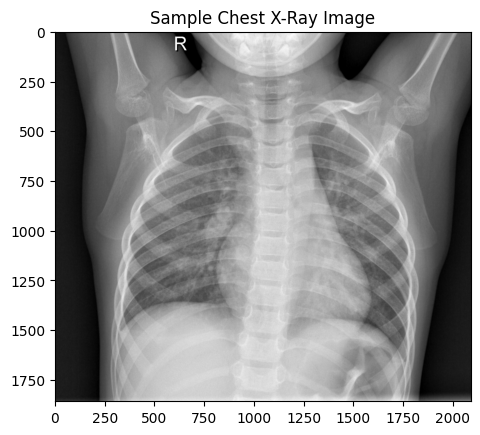

In [5]:
# Visualize a sample image
sample_image_path = os.path.join(train_dir, 'NORMAL', 'IM-0115-0001.jpeg')
sample_image = cv2.imread(sample_image_path)
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title('Sample Chest X-Ray Image')
plt.show()


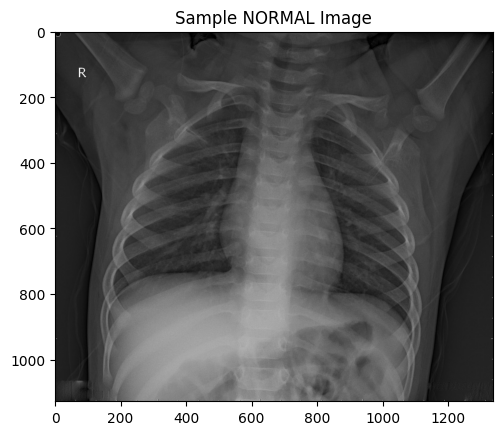

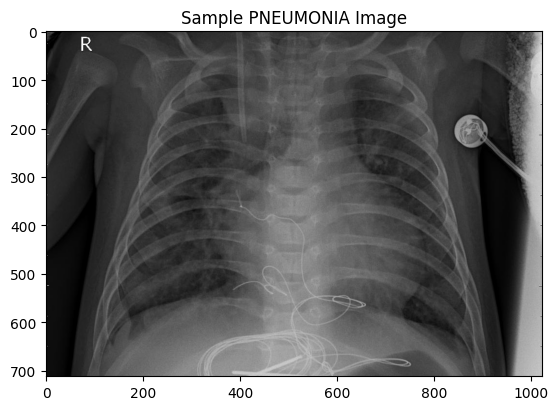

In [7]:
categories = ['NORMAL', 'PNEUMONIA']

for category in categories:
    path = os.path.join(train_dir, category)
    sample_image = os.listdir(path)[0]
    img = cv2.imread(os.path.join(path, sample_image))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Sample {category} Image')
    plt.show()


In [8]:
# Function to count images in each category
def count_images(directory):
    counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return counts

# Count images in train, validation, and test directories
train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)
test_counts = count_images(test_dir)

print('Training Set:', train_counts)
print('Validation Set:', validation_counts)
print('Testing Set:', test_counts)

# Analyze image dimensions
sample_img = cv2.imread(os.path.join(train_dir, 'NORMAL', os.listdir(os.path.join(train_dir, 'NORMAL'))[0]))
print('Sample Image Dimensions:', sample_img.shape)


Training Set: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Validation Set: {'NORMAL': 8, 'PNEUMONIA': 8}
Testing Set: {'NORMAL': 234, 'PNEUMONIA': 390}
Sample Image Dimensions: (1128, 1336, 3)


In [ ]:
# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Reshape data to add channel dimension
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(-1, X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

# Verify shapes after reshaping
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_val.shape)
print('Testing Data Shape:', X_test.shape)


Training Set: {'NORMAL': 1341, 'PNEUMONIA': 3875}
Validation Set: {'NORMAL': 8, 'PNEUMONIA': 8}
Testing Set: {'NORMAL': 234, 'PNEUMONIA': 390}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


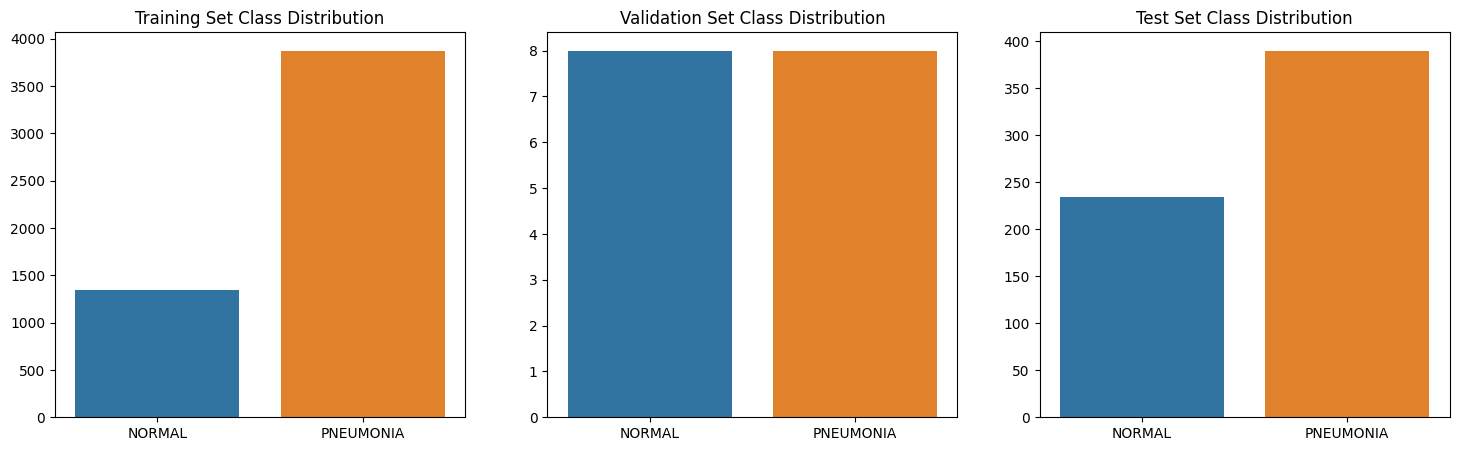

In [10]:
# Function to count images in each category
def count_images(directory):
    counts = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return counts

# Count images in train, validation, and test directories
train_counts = count_images(train_dir)
validation_counts = count_images(validation_dir)
test_counts = count_images(test_dir)

print('Training Set:', train_counts)
print('Validation Set:', validation_counts)
print('Testing Set:', test_counts)

# Plot class distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), ax=ax[0])
ax[0].set_title('Training Set Class Distribution')

sns.barplot(x=list(validation_counts.keys()), y=list(validation_counts.values()), ax=ax[1])
ax[1].set_title('Validation Set Class Distribution')

sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), ax=ax[2])
ax[2].set_title('Test Set Class Distribution')

plt.show()


In [12]:
# Function to get image dimensions
def get_image_dimensions(directory):
    dimensions = []
    for category in categories:
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            dimensions.append(img_array.shape)
    return dimensions

# Get dimensions for training images
train_dimensions = get_image_dimensions(train_dir)

# Convert to numpy array for easier manipulation
train_dimensions = np.array(train_dimensions)

# Print some statistics about image dimensions
print(f"Image Dimensions (Height x Width):")
print(f"Mean: {train_dimensions.mean(axis=0)}")
print(f"Standard Deviation: {train_dimensions.std(axis=0)}")
print(f"Min: {train_dimensions.min(axis=0)}")
print(f"Max: {train_dimensions.max(axis=0)}")



Image Dimensions (Height x Width):
Mean: [ 968.07476994 1320.61081288]
Standard Deviation: [378.81937267 355.26468303]
Min: [127 384]
Max: [2663 2916]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


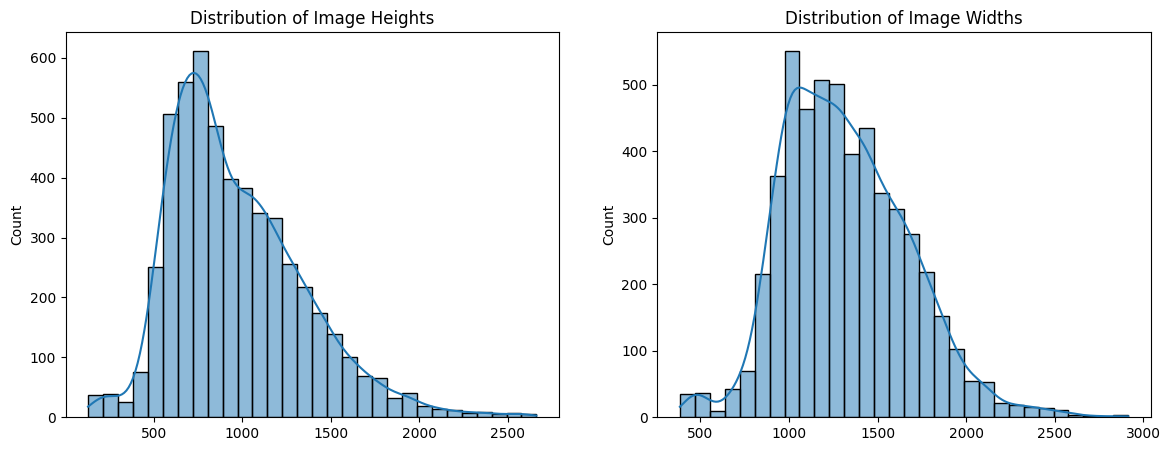

In [13]:
# Plot distribution of image dimensions
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(train_dimensions[:, 0], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Image Heights')
sns.histplot(train_dimensions[:, 1], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Image Widths')
plt.show()


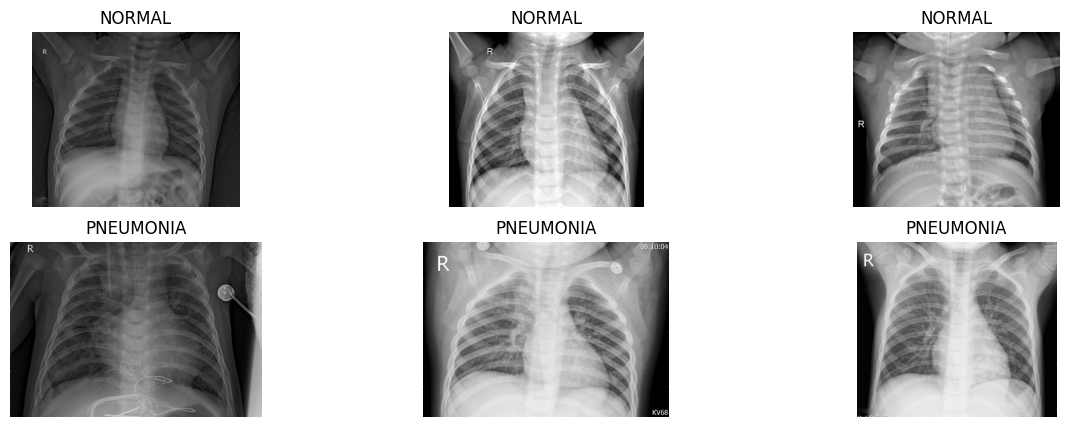

In [14]:
# Function to display sample images from each category
def display_sample_images(directory, categories, sample_count=3):
    fig, axes = plt.subplots(len(categories), sample_count, figsize=(15, 5))
    for i, category in enumerate(categories):
        path = os.path.join(directory, category)
        for j in range(sample_count):
            img_path = os.path.join(path, os.listdir(path)[j])
            img = cv2.imread(img_path)
            axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[i, j].set_title(f'{category}')
            axes[i, j].axis('off')
    plt.show()

# Display sample images from training set
display_sample_images(train_dir, categories)


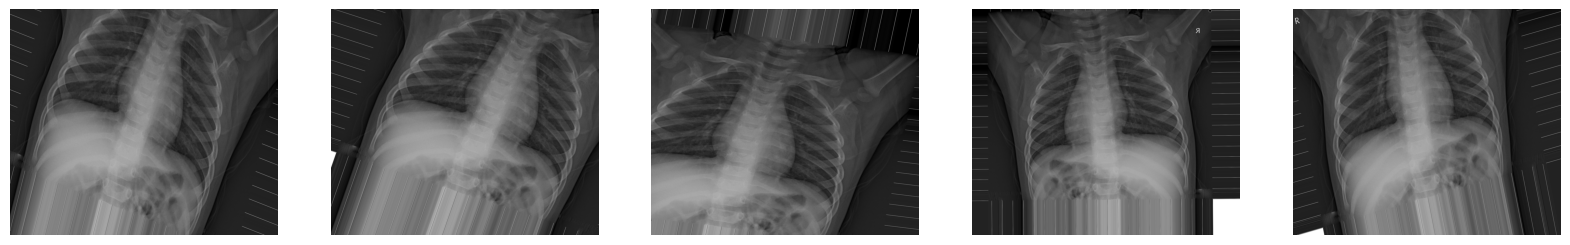

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load a sample image
sample_img_path = os.path.join(train_dir, 'NORMAL', os.listdir(os.path.join(train_dir, 'NORMAL'))[0])
sample_img = cv2.imread(sample_img_path)
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_img = sample_img.reshape((1,) + sample_img.shape)

# Generate augmented images
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
i = 0
for batch in datagen.flow(sample_img, batch_size=1):
    axes[i].imshow(batch[0].astype('uint8'))
    axes[i].axis('off')
    if i == 4:
        break
    i += 1
plt.show()


In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

In [3]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

BATCH_SIZE = 32

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    brightness_range=(1.2, 1.5),
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

val_data = train_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

mobilenet.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))

pretrained_model = mobilenet(inputs, training=False)

dense = tf.keras.layers.Dense(1024, activation='relu')(pretrained_model)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)


model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

None


In [9]:
EPOCHS = 10

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/163 ━━━━━━━━━━━━━━━━━━━━ 54:02 20s/step - accuracy: 0.7188 - auc: 0.6914 - loss: 0.5799

I0000 00:00:1716652917.593034     147 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 ━━━━━━━━━━━━━━━━━━━━ 158s 850ms/step - accuracy: 0.8670 - auc: 0.8959 - loss: 0.3949 - val_accuracy: 0.8125 - val_auc: 0.9531 - val_loss: 0.3112
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 678ms/step - accuracy: 0.9573 - auc: 0.9909 - loss: 0.1074 - val_accuracy: 0.6250 - val_auc: 0.9766 - val_loss: 0.9965
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 678ms/step - accuracy: 0.9594 - auc: 0.9915 - loss: 0.1059 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.2383
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 665ms/step - accuracy: 0.9670 - auc: 0.9947 - loss: 0.0822 - val_accuracy: 0.8125 - val_auc: 0.9844 - val_loss: 0.3418
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 668ms/step - accuracy: 0.9652 - auc: 0.9927 - loss: 0.0945 - val_accuracy: 0.9375 - val_auc: 0.9844 - val_loss: 0.2944
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 114s 668ms/step - accuracy: 0.9702 - auc: 0.9947 - loss: 0.0791 - val_accuracy: 0.6875 - val_auc: 0.9531 - val_loss: 1.0057


In [13]:
pred_labels = np.squeeze(np.array(model.predict(test_data) >= 0.5, dtype=int))
pred_labels = (model.predict(test_data) >= 0.5).astype(int).reshape(-1)

true_labels = test_data.labels

pred_labels = (model.predict(test_data) >= 0.5).astype(int).reshape(-1)

cm = confusion_matrix(true_labels, pred_labels)

print(cm)


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 648ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 651ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 653ms/step
[[ 40 194]
 [ 85 305]]


In [14]:
test_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

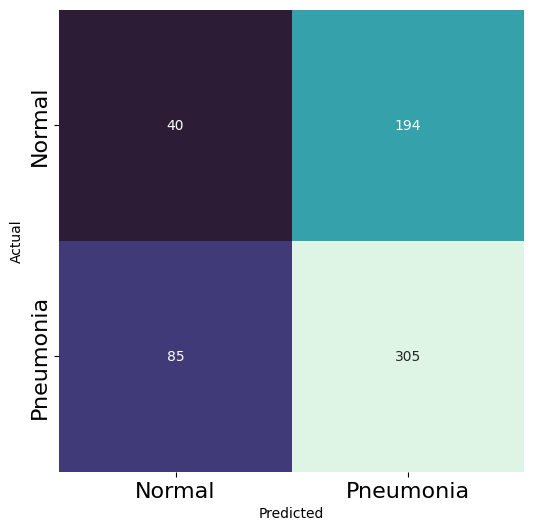

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(np.arange(2) + 0.5, ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [16]:
results = model.evaluate(test_data, verbose=0)

accuracy = results[1]
auc = results[2]

In [17]:
tn, fp, fn, tp = cm.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

In [18]:
print("Accuracy: {:.2f}".format(accuracy))
print("AUC: {:.2f}".format(auc))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


Accuracy: 0.79
AUC: 0.94
Precision: 0.61
Recall: 0.78


In [19]:
test_loss, test_acc, test_auc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test AUC: {test_auc:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 646ms/step - accuracy: 0.7825 - auc: 0.9250 - loss: 0.6674
Test Accuracy: 0.8045
Test AUC: 0.9351


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [23]:
report = classification_report(true_labels, pred_labels, target_names=test_data.class_indices.keys())
print(report)

              precision    recall  f1-score   support

      NORMAL       0.32      0.17      0.22       234
   PNEUMONIA       0.61      0.78      0.69       390

    accuracy                           0.55       624
   macro avg       0.47      0.48      0.45       624
weighted avg       0.50      0.55      0.51       624



In [24]:
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.6112
Recall: 0.7821
F1 Score: 0.6862


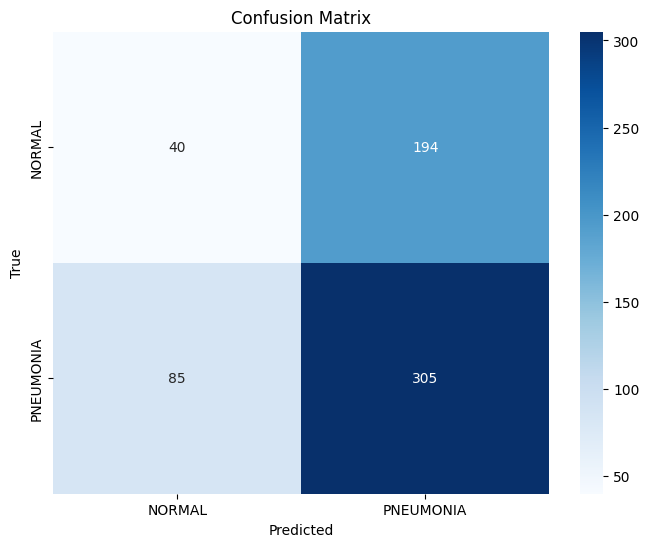

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

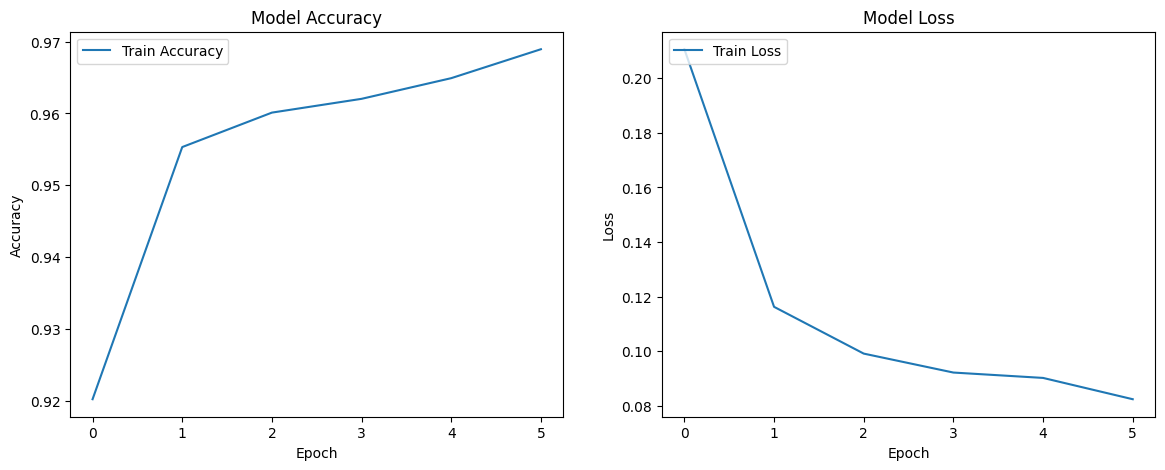

In [28]:
# Plot training accuracy and loss values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')

# Plot training loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper left')

plt.show()
